# Data classification of matrix using SGDclassifier (OvR method)

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
#from sklearn.multiclass import OneVsRestClassifier

In [3]:
%run "../../common/matrix.py"
%run "../../common/Functions.py"
%run "../../common/file_handler.py"
%run "../../common/function_classifier.py"
%run "../../common/plot_functions.py"
%run "../../common/grid_search_sgd.py"
%run "../extra/multiclass.py"

In [4]:
PERF_PLOT_XSIZE = 15
PERF_PLOT_YSIZE = 8

In [5]:
FIGSAVE= False

Import matrix and file json

In [6]:
imported_matrix = open_file_from_fullpath(ask_file_path(), 'r')
matrix_tobe_classified = pd.read_perseus(imported_matrix)

In [7]:
matrix_json = open_file_from_fullpath(ask_file_path(), 'r')

Matrix manipolation

In [8]:
matrix_tobe_cl_noqc = slice_submatrix(matrix_tobe_classified,get_value_from_json(matrix_json,'sample_slice'))
dictionary_cl_noqc, matrix_tobe_cl_noqc = rename_matrixheader_labels(matrix_tobe_cl_noqc, get_value_from_json(matrix_json,'sample_rename'))

In [9]:
binary_features = create_feature_matrix(matrix_tobe_cl_noqc)
binary_labels = create_labels_binary(matrix_tobe_cl_noqc, 'healthy', 'sick', ['control'], ['local', 'post', 'onset'])
multiclass_features = create_feature_matrix(matrix_tobe_cl_noqc)
multiclass_labels = create_labels(matrix_tobe_cl_noqc)
sick_features = create_feature_matrix(matrix_tobe_cl_noqc, drop='control')
sick_labels = create_labels(matrix_tobe_cl_noqc, drop='control')

In [ ]:
binary_label_1_case = create_labels(matrix_tobe_cl_noqc, drop= ['post', 'local'])
binary_label_2_case = create_labels(matrix_tobe_cl_noqc, drop = ['post', 'onset'])
binary_features_1_case = create_feature_matrix(matrix_tobe_cl_noqc, drop=['post', 'local'])
binary_features_2_case = create_feature_matrix(matrix_tobe_cl_noqc, drop = ['post', 'onset'])

1) Binary 

Global Params 

In [10]:
skf = StratifiedKFold(n_splits= 4, shuffle = True, random_state= 0)
param_grid_l1 = { 'alpha'  : [0.0001, 0.005, 0.01, 0.05, 0.08, 0.1, 0.5, 0.7, 1.5, 1.9], 'penalty' : ['l1'], 'loss':['hinge']}
param_grid_l2 = { 'alpha'  : [0.0001, 0.005, 0.01, 0.05, 0.08, 0.1, 0.5, 0.7, 1.5, 1.9], 'penalty' : ['l2'], 'loss':['hinge']}

In [11]:
Xbin_train, Xbin_test, ybin_train, ybin_test = train_test_split(binary_features, binary_labels, test_size=0.2, random_state=0, stratify= binary_labels)
Xbin_OC_train, Xbin_OC_test, ybin_OC_train, ybin_OC_test = train_test_split(binary_features_1_case, binary_label_1_case, test_size= 0.20, random_state=0, stratify= binary_label_1_case)
Xbin_CL_train, Xbin_CL_test, ybin_CL_train, ybin_CL_test = train_test_split(binary_features_2_case, binary_label_2_case, test_size= 0.20, random_state=0, stratify= binary_label_2_case)

In [12]:
binary_SGD_grid_l2 =grid_search_sgd(features=Xbin_train, labels=ybin_train, parameters=param_grid_l2, cv=skf, scoring=None, name="", checkpoint_path=None, checkpoint=False)
binary_SGD_grid_l1 = grid_search_sgd(features=Xbin_train, labels=ybin_train, parameters=param_grid_l1, cv=skf, scoring=None, name="", checkpoint_path=None, checkpoint=False)

# binary control vs onset
sgd_grid_OC_l2_binary = grid_search_sgd(features=Xbin_OC_train, labels=ybin_OC_train, parameters=param_grid_l2, cv=skf,  name="", checkpoint_path=None, checkpoint=False)
sgd_grid_OC_l1_binary = grid_search_sgd(features=Xbin_OC_train, labels=ybin_OC_train, parameters=param_grid_l1, cv=skf,  name="", checkpoint_path=None, checkpoint=False)

#binary control vs local
sgd_grid_CL_l2_binary = grid_search_sgd(features=Xbin_CL_train, labels=ybin_CL_train, parameters=param_grid_l2, cv=skf,  name="", checkpoint_path=None, checkpoint=False)
sgd_grid_CL_l1_binary = grid_search_sgd(features=Xbin_CL_train, labels=ybin_CL_train, parameters=param_grid_l1, cv=skf,  name="", checkpoint_path=None, checkpoint=False)



Grid search completed!

Grid search completed!


In [13]:
binary_SGDclassifier_l1 = SGDClassifier(loss='hinge', penalty='l1', alpha= binary_SGD_grid_l1[0].best_params_['alpha'], n_jobs= -1 )
binary_SGDclassifier_l1.fit(Xbin_train, ybin_train)
binary_SGDclassifier_l2 = SGDClassifier(loss='hinge', penalty='l2', alpha= binary_SGD_grid_l2[0].best_params_['alpha'], n_jobs= -1)
binary_SGDclassifier_l2.fit(Xbin_train, ybin_train)

SGDClassifier(alpha=0.01, n_jobs=-1)

In [ ]:
binary_OC_classifier_l2 = SGDClassifier(loss='hinge', penalty='l2', alpha=sgd_grid_OC_l2_binary[0].best_params_['alpha'])
binary_OC_classifier_l2.fit(Xbin_OC_train, ybin_OC_train)
binary_OC_classifier_l1 = SGDClassifier(loss='hinge', penalty='l1', alpha=sgd_grid_OC_l1_binary[0].best_params_['alpha'])
binary_OC_classifier_l1.fit(Xbin_OC_train, ybin_OC_train)

In [ ]:
binary_CL_classifier_l2 = SGDClassifier(loss='hinge', penalty='l2', alpha=sgd_grid_CL_l2_binary[0].best_params_['alpha'])
binary_CL_classifier_l2.fit(Xbin_CL_train, ybin_CL_train)
binary_CL_classifier_l1 = SGDClassifier(loss='hinge', penalty='l1', alpha=sgd_grid_CL_l1_binary[0].best_params_['alpha'])
binary_CL_classifier_l1.fit(Xbin_CL_train, ybin_CL_train)

In [14]:
pred_binary_SGDl1 = binary_SGDclassifier_l1.predict(Xbin_test)
pred_binary_SGDl2 = binary_SGDclassifier_l2.predict(Xbin_test)

pred_binary_OC_SGDl1 = binary_OC_classifier_l1.predict(Xbin_OC_test)
pred_binary_OC_SGDl2 = binary_OC_classifier_l2.predict(Xbin_OC_test)

pred_binary_CL_SGDl2 = binary_CL_classifier_l1.predict(Xbin_CL_test)
pred_binary_CL_SGDl1 = binary_CL_classifier_l2.predict(Xbin_CL_test)

In [15]:
cm_binSGD_l1 = confusion_matrix(ybin_test, pred_binary_SGDl1,normalize='pred')
cm_binSGD_l2 = confusion_matrix(ybin_test, pred_binary_SGDl2, normalize='pred')

cm_bin_CL_SGD_L1 = confusion_matrix(ybin_CL_test, pred_binary_CL_SGDl1,normalize='pred')
cm_bin_CL_SGD_L2 = confusion_matrix(ybin_CL_test, pred_binary_CL_SGDl2,normalize='pred')


cm_bin_OC_SGD_L1 = confusion_matrix(ybin_OC_test, pred_binary_OC_SGDl1,normalize='pred')
cm_bin_OC_SGD_L2 = confusion_matrix(ybin_OC_test, pred_binary_OC_SGDl2,normalize='pred')

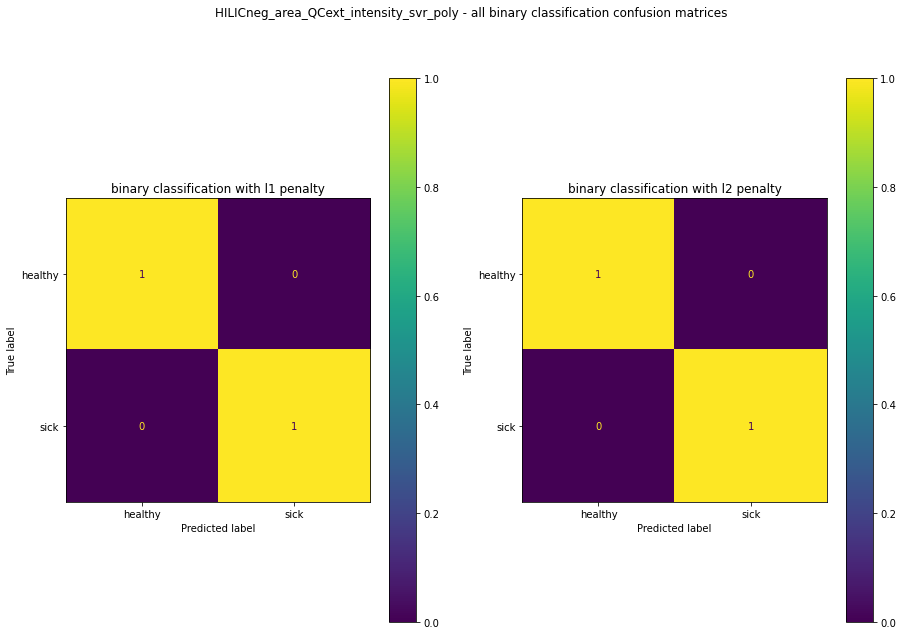

In [16]:
function_subplots_confusionmatrix([cm_binSGD_l1, cm_binSGD_l2], 1, 2, ['binary classification with l1 penalty', 'binary classification with l2 penalty'], get_file_name(imported_matrix) + ' - all binary classification confusion matrices', 15, 10, labels =[binary_SGDclassifier_l1.classes_, binary_SGDclassifier_l2.classes_], fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_SGD_OVR_confusion_matrix_binary','.svg'))

In [17]:
print_results(ybin_test, pred_binary_SGDl1)
print('\t')
print_results(ybin_test, pred_binary_SGDl2)

Accuracy: 1.000
Balanced Accuracy: 1.000
f1 score: 1.000 
	
Accuracy: 1.000
Balanced Accuracy: 1.000
f1 score: 1.000 


In [ ]:
function_subplots_confusionmatrix([cm_bin_CL_SGD_L1, cm_bin_CL_SGD_L2], 1, 2, ['binary classification control vs local with l1 penalty', 'binary classification control vs local with l2 penalty'], get_file_name(imported_matrix) + ' - all binary classification confusion matrices', 15, 10, labels =[binary_CL_classifier_l1.classes_, binary_CL_classifier_l2.classes_], fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_SGD_OVR_confusion_matrix_binary_CL','.svg'))

In [ ]:
print_results(ybin_CL_test, pred_binary_CL_SGDl1)
print('\t')
print_results(ybin_CL_test, pred_binary_CL_SGDl2)

In [ ]:
function_subplots_confusionmatrix([cm_bin_OC_SGD_L1, cm_bin_OC_SGD_L2], 1, 2, ['binary classification control vs onset with l1 penalty', 'binary classification control vs onset with l2 penalty'], get_file_name(imported_matrix) + ' - all binary classification confusion matrices', 15, 10, labels =[binary_OC_classifier_l1.classes_, binary_OC_classifier_l2.classes_], fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_SGD_OVR_confusion_matrix_binary_OC','.svg'))

In [ ]:
print_results(ybin_OC_test, pred_binary_OC_SGDl1)
print('\t')
print_results(ybin_OC_test, pred_binary_OC_SGDl2)

2) OVR

In [18]:
Xmulti_train, Xmulti_test, ymulti_train, ymulti_test = train_test_split(multiclass_features, multiclass_labels, test_size=0.2, random_state=0, stratify= multiclass_labels)

In [19]:
multi_SGD_l1 = OneVsRestClassifier(SGDClassifier(n_jobs= -1, max_iter= 4000))
multi_SGD_l1.fit(Xmulti_train, ymulti_train, param_grid_l1, skf)
multi_SGD_l2 = OneVsRestClassifier(SGDClassifier( n_jobs= -1, max_iter= 4000 ))
multi_SGD_l2.fit(Xmulti_train, ymulti_train, param_grid_l2, skf)

OneVsRestClassifier(estimator=SGDClassifier(max_iter=4000, n_jobs=-1))

In [20]:
pred_multi_l1 =multi_SGD_l1.predict(Xmulti_test)
pred_multi_l2 = multi_SGD_l2.predict(Xmulti_test)

In [21]:
cm_multiSGD_l1 = confusion_matrix(ymulti_test, pred_multi_l1, normalize='pred')
cm_multiSGD_l2 = confusion_matrix(ymulti_test, pred_multi_l2, normalize='pred')

SICK categories classification OVR

In [22]:
Xsick_train, Xsick_test, ysick_train, ysick_test = train_test_split(sick_features, sick_labels, random_state=0, test_size=0.20, stratify= sick_labels )

In [23]:
sick_SGDclass_l1 = OneVsRestClassifier(SGDClassifier(max_iter=4000, n_jobs=-1))
sick_SGDclass_l1.fit(Xsick_train, ysick_train, param_grid_l1, skf)
sick_SGDclass_l2 = OneVsRestClassifier(SGDClassifier(max_iter = 4000, n_jobs= -1))
sick_SGDclass_l2.fit(Xsick_train, ysick_train, param_grid_l2, skf)

OneVsRestClassifier(estimator=SGDClassifier(max_iter=4000, n_jobs=-1))

In [24]:
predi_SGDsick_l1 = sick_SGDclass_l1.predict(Xsick_test)
predi_SGDsick_l2 = sick_SGDclass_l2.predict(Xsick_test)

In [25]:
cm_sickSGD_l1 = confusion_matrix(ysick_test, predi_SGDsick_l1, normalize= 'pred')
cm_sickSGD_l2 = confusion_matrix(ysick_test, predi_SGDsick_l2, normalize= 'pred')

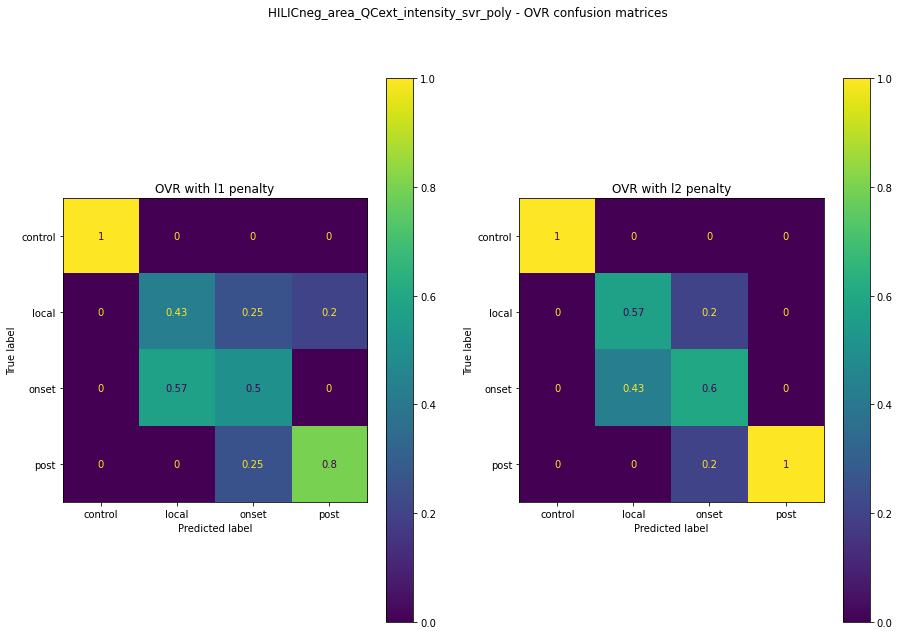

In [26]:
function_subplots_confusionmatrix([cm_multiSGD_l1, cm_multiSGD_l2], 1, 2, ['OVR with l1 penalty', 'OVR with l2 penalty'], get_file_name(imported_matrix) + ' - OVR confusion matrices', 15, 10, labels =[ multi_SGD_l1.classes_, multi_SGD_l2.classes_, ], fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_SGD_OVR_confusion_matrix_multi','.svg'))

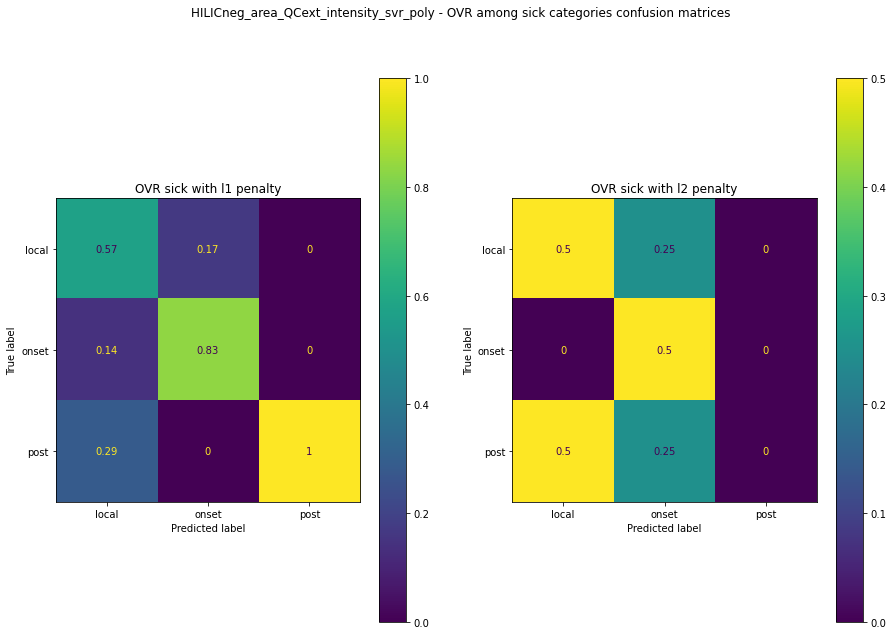

In [28]:
function_subplots_confusionmatrix([cm_sickSGD_l1, cm_sickSGD_l2], 1, 2, ['OVR sick with l1 penalty', 'OVR sick with l2 penalty'], get_file_name(imported_matrix) + ' - OVR among sick categories confusion matrices', 15, 10, labels =[sick_SGDclass_l1.classes_, sick_SGDclass_l2.classes_ ], fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_SGD_OVR_confusion_matrix_multisick','.svg'))

In [29]:
print_results(ymulti_test, pred_multi_l1)
print('\t')
print_results(ymulti_test, pred_multi_l2)
print('\t')
print_results(ysick_test, predi_SGDsick_l1)
print('\t')
print_results(ysick_test, predi_SGDsick_l2)

Accuracy: 0.650
Balanced Accuracy: 0.683
f1 score: 0.645 
	
Accuracy: 0.750
Balanced Accuracy: 0.775
f1 score: 0.753 
	
Accuracy: 0.750
Balanced Accuracy: 0.744
f1 score: 0.755 
	
Accuracy: 0.500
Balanced Accuracy: 0.467
f1 score: 0.389 


Perfomarces of classifiers

In [30]:
binary_df = create_dataframe(['X', 'Y'], [[binary_SGDclassifier_l1.penalty, binary_SGDclassifier_l2.penalty], 
[balanced_accuracy_score(ybin_test, pred_binary_SGDl1), balanced_accuracy_score(ybin_test, pred_binary_SGDl2)]])

multi_df = create_dataframe(['X', 'Y'], [[multi_SGD_l1.estimators_[0].penalty,  multi_SGD_l2.estimators_[0].penalty],
[balanced_accuracy_score(ymulti_test, pred_multi_l1), balanced_accuracy_score(ymulti_test, pred_multi_l2)]])

sick_df = create_dataframe(['X', 'Y'], [[sick_SGDclass_l1.estimators_[0].penalty, sick_SGDclass_l2.estimators_[0].penalty],
[balanced_accuracy_score(ysick_test, predi_SGDsick_l1), balanced_accuracy_score(ysick_test, predi_SGDsick_l2)]])

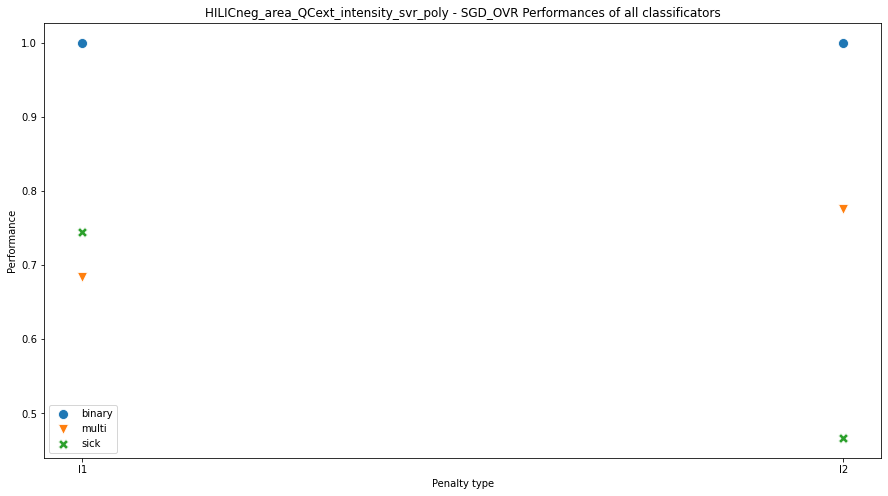

In [32]:
performances = display_performances_wl([binary_df, multi_df, sick_df],get_file_name(imported_matrix) + ' - SGD_OVR Performances of all classificators', 'Penalty type', 'Performance', PERF_PLOT_XSIZE, PERF_PLOT_YSIZE, ['o', 'v', 'X'], 100, ['binary', 'multi', 'sick'], fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_SGD_OVR_performances_of_all_classificators','.svg'))

In [37]:
imported_matrix.close()
matrix_json.close()